***Analyse exploratoire des données***

In [1]:
#Load the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('hmeq.csv')

In [3]:
# check the number of rows and columns
print(df.shape)

# check the first 5 rows of the data
print(df.head())

# check the summary statistics of the numerical variables
print(df.describe())

(5960, 13)
   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  
               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982   
min       0.

In [4]:
# check the number of missing values in each column
print(df.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


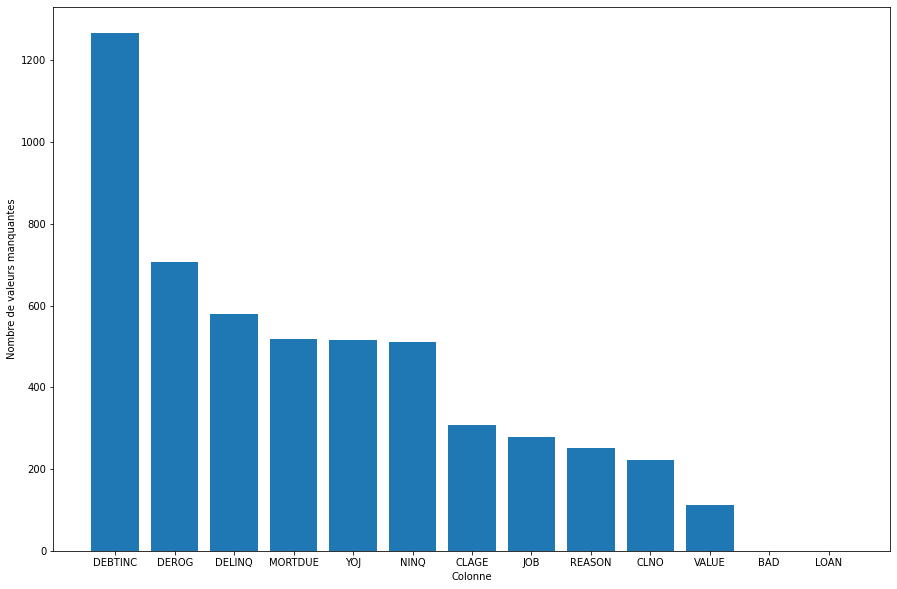

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = df.isnull().sum()

# Trier les résultats par nombre de valeurs manquantes décroissant
missing_values.sort_values(ascending=False, inplace=True)

# Tracer un diagramme de barres verticales
plt.bar(missing_values.index, missing_values.values)

# Ajouter des étiquettes d'axe
plt.xlabel('Colonne')
plt.ylabel('Nombre de valeurs manquantes')

# Afficher le diagramme
plt.show()



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


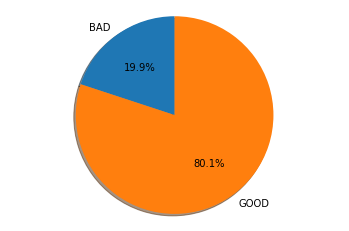

In [7]:


bad_count = df[df['BAD'] == 1].shape[0]
good_count = df[df['BAD'] == 0].shape[0]

labels = ['BAD', 'GOOD']
sizes = [bad_count, good_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


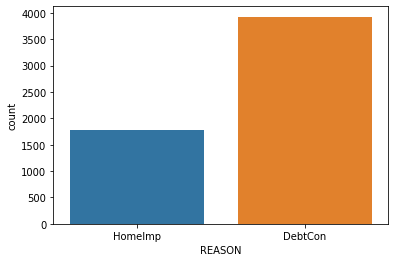

In [8]:
# plot a bar plot of the REASON variable
sns.countplot(df['REASON'])
for i in range(df['REASON'].nunique()):
    count = df['REASON'].value_counts()[i]
    
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


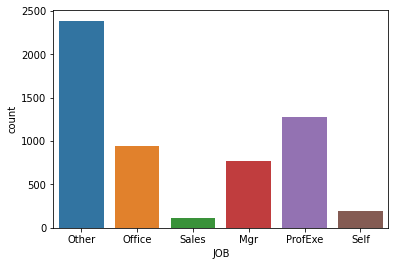

<Figure size 1440x1296 with 0 Axes>

In [9]:
# Plot a bar plot of the JOB variable
sns.countplot(df['JOB'])
for i in range(df['JOB'].nunique()):
    count = df['JOB'].value_counts()[i]
   
plt.figure(figsize=(20, 18))
plt.show()

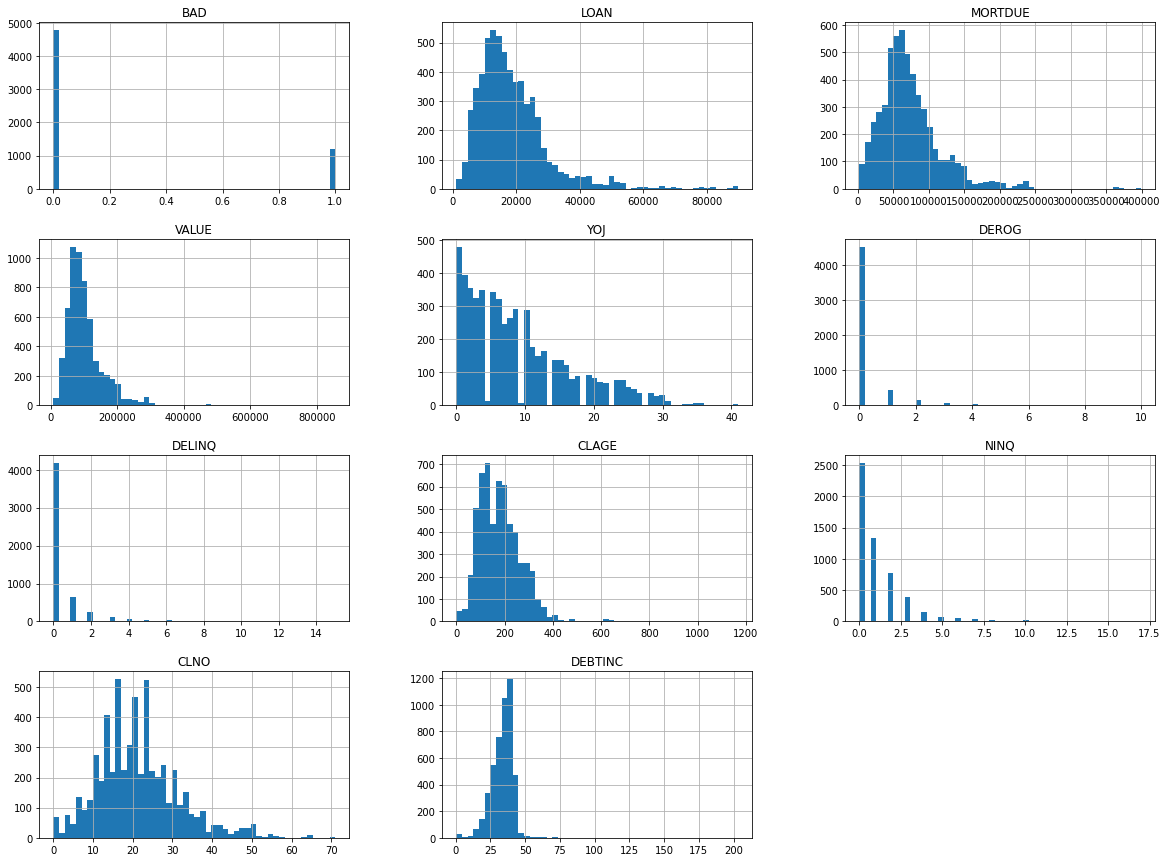

In [10]:
# plot a histogram of each numerical variable (Analyse univariée)
df.hist(bins=50, figsize=(20,15))
plt.show()


In [11]:
# compute the correlation matrix
corr = df.corr()

# print the correlation matrix
print(corr)

              BAD      LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ  \
BAD      1.000000 -0.075099 -0.048219 -0.029954 -0.060238  0.276081  0.354107   
LOAN    -0.075099  1.000000  0.228595  0.335393  0.105728 -0.001302 -0.035144   
MORTDUE -0.048219  0.228595  1.000000  0.875666 -0.088480 -0.049516 -0.001044   
VALUE   -0.029954  0.335393  0.875666  1.000000  0.007759 -0.048689 -0.014103   
YOJ     -0.060238  0.105728 -0.088480  0.007759  1.000000 -0.065879  0.038153   
DEROG    0.276081 -0.001302 -0.049516 -0.048689 -0.065879  1.000000  0.211832   
DELINQ   0.354107 -0.035144 -0.001044 -0.014103  0.038153  0.211832  1.000000   
CLAGE   -0.170499  0.088540  0.140047  0.171238  0.201718 -0.083047  0.022488   
NINQ     0.174980  0.044487  0.031392 -0.004398 -0.071627  0.173934  0.067812   
CLNO    -0.004157  0.072631  0.323631  0.269149  0.024838  0.061884  0.164639   
DEBTINC  0.199835  0.084735  0.154939  0.132174 -0.055891  0.017065  0.052364   

            CLAGE      NINQ

In [12]:
import seaborn as sns

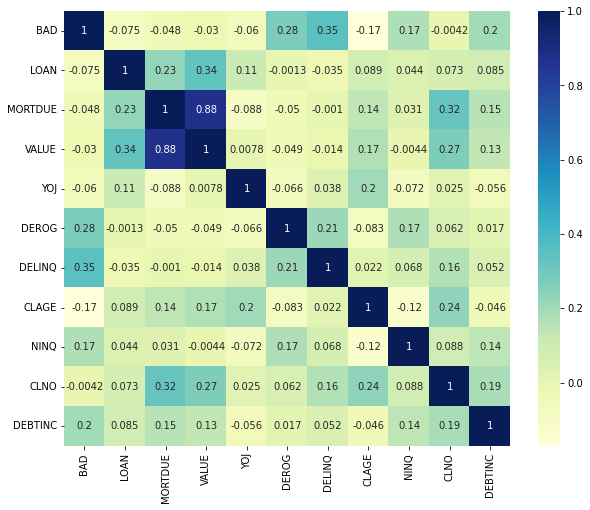

In [13]:
plt.figure(figsize=(10, 8))  # set the figure size

sns.heatmap(corr, annot=True, cmap="YlGnBu")

Khi squared 

In [14]:

from scipy.stats import chi2_contingency

# Select the relevant columns
categorical_var = df[['BAD', 'JOB','REASON']]

# Create a contingency table for the variables JOB and BAD
ct_job = pd.crosstab(categorical_var['JOB'], categorical_var['BAD'], margins=True)

# Conduct the chi-squared test of independence for JOB and BAD
stat, p, dof, expected = chi2_contingency(ct_job)
print(f'Chi-squared test statistic for JOB and BAD: {stat:.10f}')
print(f'p-value for JOB and BAD: {p:.5f}')

# Create a contingency table for the variables REASON and BAD
ct_reason = pd.crosstab(df['REASON'], df['BAD'], margins=True)

# Conduct the chi-squared test of independence for REASON and BAD
stat, p, dof, expected = chi2_contingency(ct_reason)
print(f'Chi-squared test statistic for REASON and BAD: {stat:.5f}')
print(f'p-value for REASON and BAD: {p:.5f}')

Chi-squared test statistic for JOB and BAD: 81.9324895369
p-value for JOB and BAD: 0.00000
Chi-squared test statistic for REASON and BAD: 8.24361
p-value for REASON and BAD: 0.08305



### Data processing


KNN traitement de valeurs manquantes 

In [15]:
import pandas as pd 
import numpy as np 
from sklearn.impute import KNNImputer

In [16]:
cat_variables = df[['REASON', 'JOB']] 
cat_dummies = pd.get_dummies(cat_variables, drop_first=False) 
cat_dummies.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [17]:
#Creation des "variables factices"

df = df.drop(['REASON', 'JOB'], axis=1) 
df = pd.concat([df, cat_dummies], axis=1) 
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,0,1,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0,1,0,1,0,0,0,0


In [18]:
# les différentes échelles de nos données conduiront le KNN Imputer à générer des remplacements biaisés
#pour les valeurs manquantes donc on va normaliser les données pour avoir des valeurs comprises entre 0 et 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1.0,0.000000,0.059869,0.036590,0.256098,0.0,0.000000,0.080777,0.058824,0.126761,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.002252,0.171050,0.071234,0.170732,0.0,0.133333,0.104289,0.000000,0.197183,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.004505,0.028773,0.010261,0.097561,0.0,0.000000,0.127942,0.058824,0.140845,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.004505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.006757,0.240856,0.122655,0.073171,0.0,0.000000,0.079893,0.000000,0.197183,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.impute import KNNImputer
# imputation sur la base des 5 plus proches voisins sans données manquantes
#  obtenus à partir de distances calculées avec les seules données présentes
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
# les valeurs manquantes seront remplacées par la valeur moyenne des 5 voisins
#les plus proches mesurée par la distance euclidienne.

In [20]:
df.isna().any()

BAD               False
LOAN              False
MORTDUE           False
VALUE             False
YOJ               False
DEROG             False
DELINQ            False
CLAGE             False
NINQ              False
CLNO              False
DEBTINC           False
REASON_DebtCon    False
REASON_HomeImp    False
JOB_Mgr           False
JOB_Office        False
JOB_Other         False
JOB_ProfExe       False
JOB_Sales         False
JOB_Self          False
dtype: bool

In [21]:
print(df.isnull().sum())

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   float64
 1   LOAN            5960 non-null   float64
 2   MORTDUE         5960 non-null   float64
 3   VALUE           5960 non-null   float64
 4   YOJ             5960 non-null   float64
 5   DEROG           5960 non-null   float64
 6   DELINQ          5960 non-null   float64
 7   CLAGE           5960 non-null   float64
 8   NINQ            5960 non-null   float64
 9   CLNO            5960 non-null   float64
 10  DEBTINC         5960 non-null   float64
 11  REASON_DebtCon  5960 non-null   float64
 12  REASON_HomeImp  5960 non-null   float64
 13  JOB_Mgr         5960 non-null   float64
 14  JOB_Office      5960 non-null   float64
 15  JOB_Other       5960 non-null   float64
 16  JOB_ProfExe     5960 non-null   float64
 17  JOB_Sales       5960 non-null   f

In [23]:
df_unscaled = scaler.inverse_transform(df)
df_unscaled = pd.DataFrame(df_unscaled, columns = df.columns)
df_unscaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1.0,1100.0,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.0,9.0,32.332719,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1300.0,70053.0,68400.0,7.00,0.0,2.0,121.833333,0.0,14.0,31.532386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1500.0,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.0,10.0,29.516886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1500.0,37079.8,65068.2,7.58,2.0,2.8,175.920223,6.0,13.0,11.139221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1700.0,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.0,14.0,30.517979,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df = df_unscaled
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1.0,1100.0,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.0,9.0,32.332719,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1300.0,70053.0,68400.0,7.00,0.0,2.0,121.833333,0.0,14.0,31.532386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1500.0,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.0,10.0,29.516886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1500.0,37079.8,65068.2,7.58,2.0,2.8,175.920223,6.0,13.0,11.139221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1700.0,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.0,14.0,30.517979,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


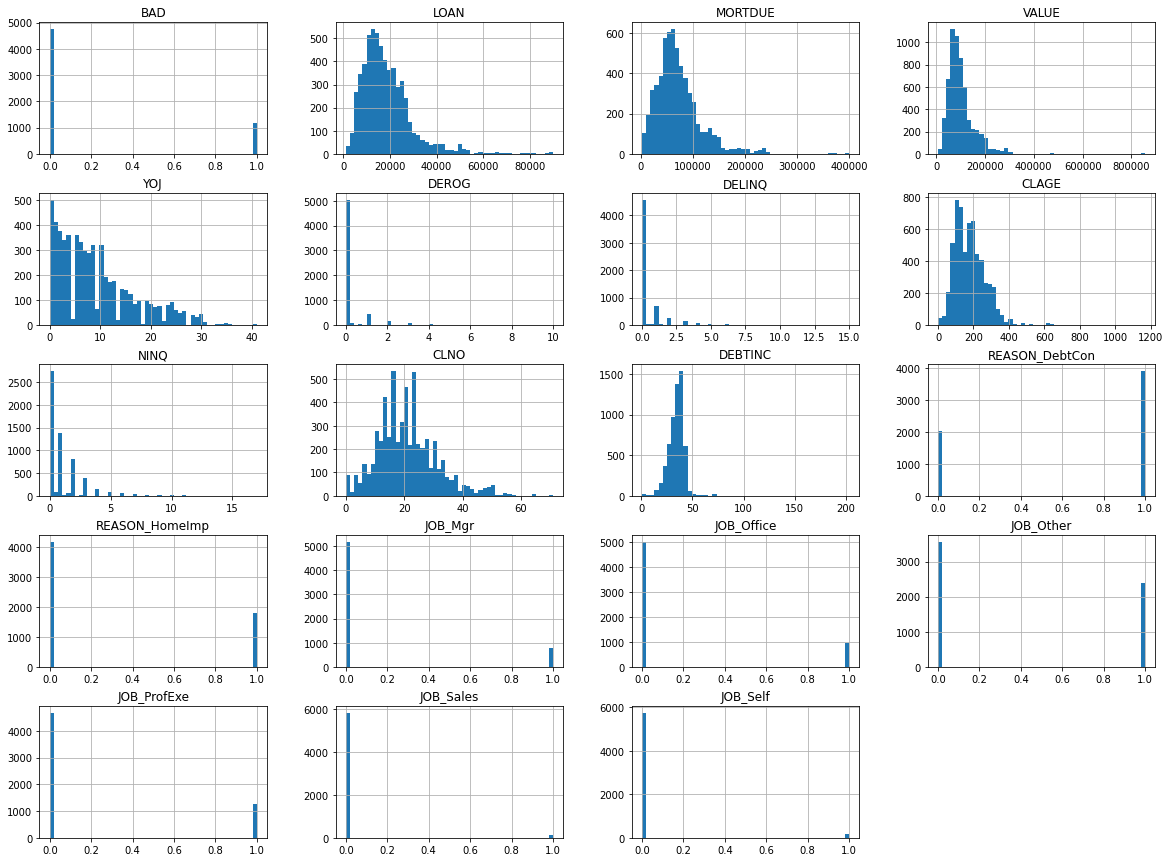

In [25]:
# plot a histogram of each numerical variable (Analyse univariée)
df.hist(bins=50, figsize=(20,15))
plt.show()

ANOVA

In [26]:
import pandas as pd
import scipy.stats as stats

# Select the numerical variables for the t-test analysis
num_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Loop through each numerical variable and perform t-test
for var in num_vars:
    print("t-test for variable:", var)
    group1 = df[df["BAD"] == 0][var]
    group2 = df[df["BAD"] == 1][var]
    stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print("t-statistic:", stat, "P-value:", p_value)
    if p_value < 0.05:
        print("Reject the null hypothesis, variables have different means.")
    else:
        print("Fail to reject the null hypothesis, variables have equal means.")
    print("\n")


t-test for variable: LOAN
t-statistic: 5.720042746865789 P-value: 1.2455336996284883e-08
Reject the null hypothesis, variables have different means.


t-test for variable: MORTDUE
t-statistic: 3.1998732051901 P-value: 0.0013997464655964827
Reject the null hypothesis, variables have different means.


t-test for variable: VALUE
t-statistic: 2.2739550275664535 P-value: 0.02310745077540997
Reject the null hypothesis, variables have different means.


t-test for variable: YOJ
t-statistic: 5.753078400760993 P-value: 1.0125943234732254e-08
Reject the null hypothesis, variables have different means.


t-test for variable: DEROG
t-statistic: -13.353612700430697 P-value: 3.7398369481126117e-38
Reject the null hypothesis, variables have different means.


t-test for variable: DELINQ
t-statistic: -18.13914248861138 P-value: 1.616853742143557e-65
Reject the null hypothesis, variables have different means.


t-test for variable: CLAGE
t-statistic: 12.718037845964922 P-value: 1.4955667777746646e-35


Discretisation decison tree



In [27]:
# Take only numerical variables
X = df.iloc[:, 1:11]
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   YOJ      5960 non-null   float64
 4   DEROG    5960 non-null   float64
 5   DELINQ   5960 non-null   float64
 6   CLAGE    5960 non-null   float64
 7   NINQ     5960 non-null   float64
 8   CLNO     5960 non-null   float64
 9   DEBTINC  5960 non-null   float64
dtypes: float64(10)
memory usage: 465.8 KB


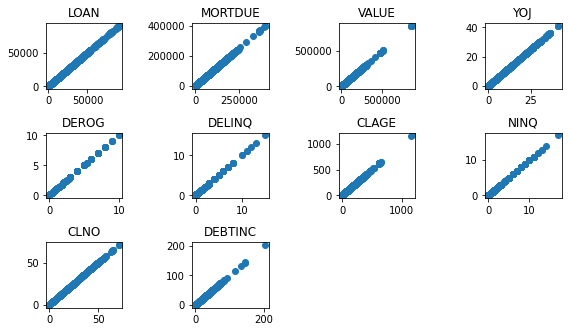

In [28]:
plt.figure(figsize=(8,6))
for j,i in enumerate(X.columns):
    plt.subplot(4,4,j+1)
    plt.scatter(X[i], X[i])
    plt.title(i)
plt.tight_layout()

       Tree  Leaf            Min            Max
0      LOAN     1    1100.000000   23900.000000
1      LOAN     3   24000.000000   42700.000000
2      LOAN     4   42800.000000   89900.000000
3   MORTDUE     1    2063.000000   93805.000000
4   MORTDUE     3   93868.000000  166000.000000
5   MORTDUE     4  166244.000000  399550.000000
6     VALUE     1    8000.000000  136877.000000
7     VALUE     3  137000.000000  364000.000000
8     VALUE     4  415000.000000  855909.000000
9       YOJ     2      12.600000      41.000000
10      YOJ     3       0.000000       5.500000
11      YOJ     4       5.600000      12.400000
12    DEROG     1       0.000000       1.400000
13    DEROG     3       1.600000       4.000000
14    DEROG     4       5.000000      10.000000
15   DELINQ     1       0.000000       1.600000
16   DELINQ     3       2.000000       4.200000
17   DELINQ     4       5.000000      15.000000
18    CLAGE     1       0.000000     193.508963
19    CLAGE     3     193.636447     281

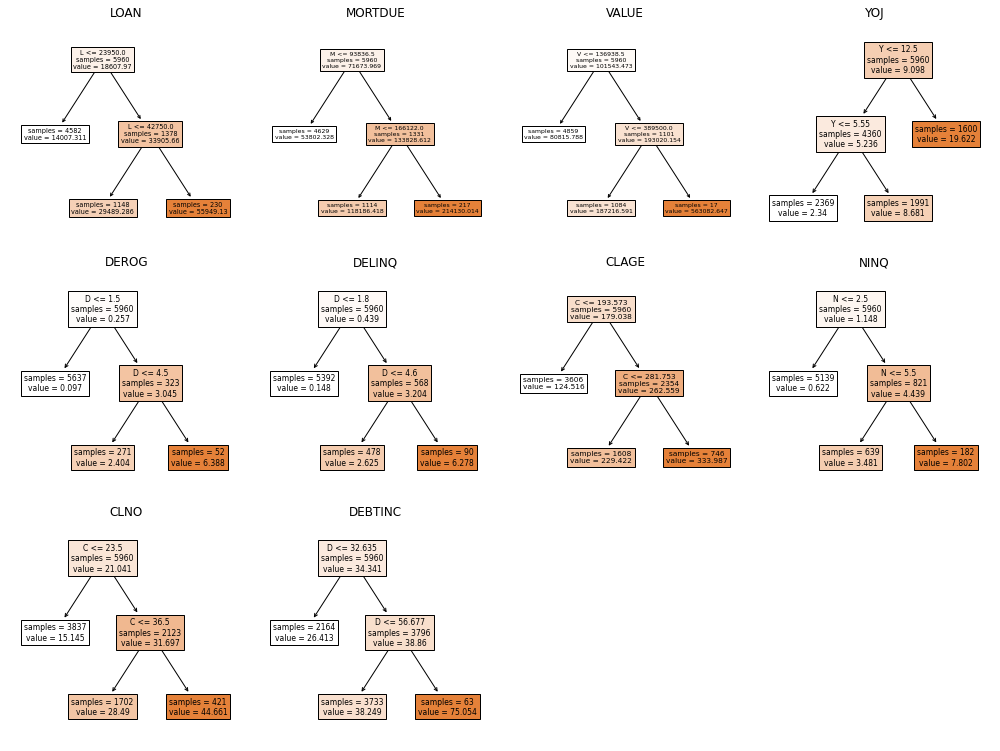

In [29]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tree_gini = []
results = []

plt.figure(figsize=(14,14))
for j, i in enumerate(X.columns):
    plt.subplot(4,4,j+1)
    var = np.array([X[i]]).reshape(-1,1)
    tree = DecisionTreeRegressor(max_leaf_nodes=3)
    tree.fit(var,var)
    tree_gini.append(tree.apply(var))
    plot_tree(tree, feature_names=i, filled=True, impurity=False)
    plt.title(i)
    
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    threshold = tree.tree_.threshold

    leaf_nodes = []
    for i in range(n_nodes):
        if children_left[i] == children_right[i]:
            leaf_nodes.append(i)

    for node in leaf_nodes:
        indices = np.where(tree.apply(var) == node)[0]
        leaf_var = var[indices]
        results.append({
            "Tree": X.columns[j],
            "Leaf": node,
            "Min": np.min(leaf_var),
            "Max": np.max(leaf_var)
        })

plt.tight_layout()
df_tree = pd.DataFrame(results)
print(df_tree )

In [30]:
discretisation_data = np.zeros((5960,10))

for j,i in enumerate(tree_gini) : 
    discretisation_data[:,j] = i.reshape(1,-1)

In [31]:
discretisation_data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [4., 1., 1., ..., 1., 1., 3.],
       [4., 1., 1., ..., 1., 1., 3.],
       [4., 1., 1., ..., 1., 1., 3.]])

In [32]:
LOAN = pd.Series(discretisation_data[:,0]).replace([1,3,4],["(1100-23900)",'(24000-42700)','(42900-89800)'])
MORTDUE = pd.Series(discretisation_data[:,1]).replace([1,3,4],["(2063-93805)",'(93868-166000)','(166244-399550)'])
VALUE = pd.Series(discretisation_data[:,2]).replace([1,3,4],["(8000-136877)",'(137000-364000)','(415000-855909)'])
YOJ = pd.Series(discretisation_data[:,3]).replace([2,3,4],["(12.6-41)",'(0-5)','(5.6-12.4)'])
DEROG = pd.Series(discretisation_data[:,4]).replace([1,3,4],["(0-1.4)",'(1.6-4)','(5-10)'])
DELINQ = pd.Series(discretisation_data[:,5]).replace([1,3,4],["(0-1.6)",'(2-4.2)','(5-15)'])
CLAGE = pd.Series(discretisation_data[:,6]).replace([1,3,4],["(0-193.50)",'(193.63-281.57)','(281.92-1168.23)'])
NINQ = pd.Series(discretisation_data[:,7]).replace([1,3,4],["(0-2.4)",'(2.6-5)','(6-17)'])
CLNO = pd.Series(discretisation_data[:,8]).replace([1,3,4],["(0-23.4)",'(23.6-36)','(37-71)'])
DEBTINC = pd.Series(discretisation_data[:,9]).replace([1,3,4],["(0.52-32.62)",'(32.64-56.39)','(56.96-203.31)'])
X_d = pd.DataFrame([LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC]).T
X_d = X_d.rename(columns={0: "LOAN", 1:"MORTDUE",2:"VALUE", 3:"YOJ",4: "DEROG",5: "DELINQ",6: "CLAGE",7: "NINQ",8: "CLNO",9: "DEBTINC"})


In [33]:
X_d.head(10)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,(1100-23900),(2063-93805),(8000-136877),(5.6-12.4),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(0.52-32.62)
1,(1100-23900),(2063-93805),(8000-136877),(5.6-12.4),(0-1.4),(2-4.2),(0-193.50),(0-2.4),(0-23.4),(0.52-32.62)
2,(1100-23900),(2063-93805),(8000-136877),(0-5),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(0.52-32.62)
3,(1100-23900),(2063-93805),(8000-136877),(5.6-12.4),(1.6-4),(2-4.2),(0-193.50),(6-17),(0-23.4),(0.52-32.62)
4,(1100-23900),(93868-166000),(8000-136877),(0-5),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(0.52-32.62)
5,(1100-23900),(2063-93805),(8000-136877),(5.6-12.4),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(32.64-56.39)
6,(1100-23900),(2063-93805),(8000-136877),(0-5),(1.6-4),(2-4.2),(0-193.50),(0-2.4),(0-23.4),(0.52-32.62)
7,(1100-23900),(2063-93805),(8000-136877),(5.6-12.4),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(32.64-56.39)
8,(1100-23900),(2063-93805),(8000-136877),(0-5),(0-1.4),(2-4.2),(193.63-281.57),(0-2.4),(0-23.4),(32.64-56.39)
9,(1100-23900),(2063-93805),(8000-136877),(12.6-41),(0-1.4),(0-1.6),(0-193.50),(0-2.4),(0-23.4),(32.64-56.39)


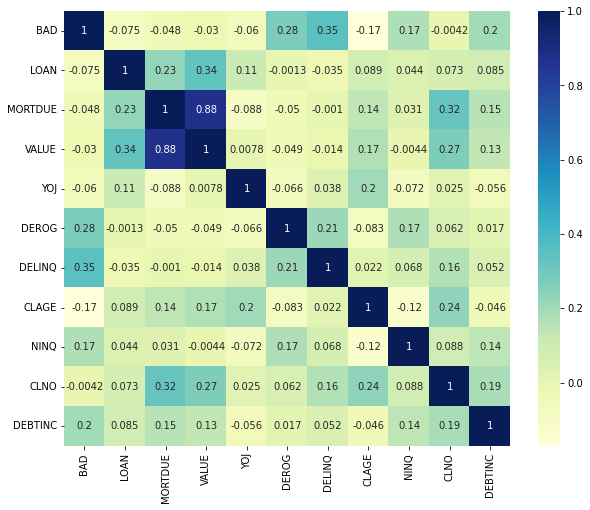

In [34]:
plt.figure(figsize=(10, 8))  # set the figure size

sns.heatmap(corr, annot=True, cmap="YlGnBu")

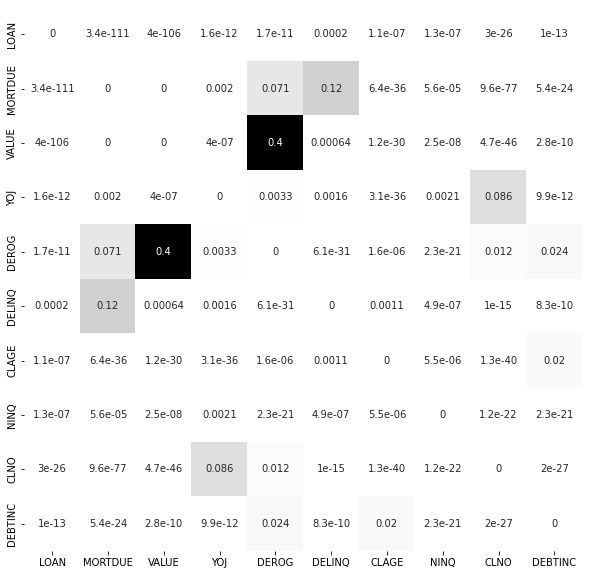

In [35]:
from scipy.stats import chi2_contingency

matrix_chi = []
columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for i in range(10):
    for j in range(10):
        test = np.array(pd.crosstab(X_d[columns[i]], X_d[columns[j]]))
        chi2_stat, p_val, dof, ex = chi2_contingency(test)
        matrix_chi.append(p_val)
chi2matrix = pd.DataFrame(np.array(matrix_chi).reshape(10,10), columns=columns, index=columns)

plt.figure(figsize=(10,10))
sns.heatmap(chi2matrix, cmap='Greys', annot=True, annot_kws={'size': 10}, cbar=False)
plt.savefig('matrix-chi.png')



In [36]:
X_d = X_d[['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]
X_d = pd.get_dummies(X_d, drop_first=False) 
X_d.head()


,LOAN_(1100-23900),LOAN_(24000-42700),LOAN_(42900-89800),MORTDUE_(166244-399550),MORTDUE_(2063-93805),MORTDUE_(93868-166000),VALUE_(137000-364000),VALUE_(415000-855909),VALUE_(8000-136877),YOJ_(0-5),...,CLAGE_(281.92-1168.23),NINQ_(0-2.4),NINQ_(2.6-5),NINQ_(6-17),CLNO_(0-23.4),CLNO_(23.6-36),CLNO_(37-71),DEBTINC_(0.52-32.62),DEBTINC_(32.64-56.39),DEBTINC_(56.96-203.31)
0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [37]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1.0,1100.0,25860.0,39025.0,10.50,0.0,0.0,94.366667,1.0,9.0,32.332719,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1300.0,70053.0,68400.0,7.00,0.0,2.0,121.833333,0.0,14.0,31.532386,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1500.0,13500.0,16700.0,4.00,0.0,0.0,149.466667,1.0,10.0,29.516886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1500.0,37079.8,65068.2,7.58,2.0,2.8,175.920223,6.0,13.0,11.139221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1700.0,97800.0,112000.0,3.00,0.0,0.0,93.333333,0.0,14.0,30.517979,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
#Creation des "variables factices"

df = df.drop(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'], axis=1) 
df = pd.concat([df, X_d], axis=1) 
df.head(39)

,BAD,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,LOAN_(1100-23900),...,CLAGE_(281.92-1168.23),NINQ_(0-2.4),NINQ_(2.6-5),NINQ_(6-17),CLNO_(0-23.4),CLNO_(23.6-36),CLNO_(37-71),DEBTINC_(0.52-32.62),DEBTINC_(32.64-56.39),DEBTINC_(56.96-203.31)
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,1,0,0,1,0,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0


In [39]:
# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [40]:
columns = df.columns
new_columns = [column.replace("_", "") for column in columns]
df.columns = new_columns
print(df.columns)

Index(['BAD', 'REASONDebtCon', 'REASONHomeImp', 'JOBMgr', 'JOBOffice',
       'JOBOther', 'JOBProfExe', 'JOBSales', 'JOBSelf', 'LOAN(1100-23900)',
       'LOAN(24000-42700)', 'LOAN(42900-89800)', 'MORTDUE(166244-399550)',
       'MORTDUE(2063-93805)', 'MORTDUE(93868-166000)', 'VALUE(137000-364000)',
       'VALUE(415000-855909)', 'VALUE(8000-136877)', 'YOJ(0-5)',
       'YOJ(12.6-41)', 'YOJ(5.6-12.4)', 'DEROG(0-1.4)', 'DEROG(1.6-4)',
       'DEROG(5-10)', 'DELINQ(0-1.6)', 'DELINQ(2-4.2)', 'DELINQ(5-15)',
       'CLAGE(0-193.50)', 'CLAGE(193.63-281.57)', 'CLAGE(281.92-1168.23)',
       'NINQ(0-2.4)', 'NINQ(2.6-5)', 'NINQ(6-17)', 'CLNO(0-23.4)',
       'CLNO(23.6-36)', 'CLNO(37-71)', 'DEBTINC(0.52-32.62)',
       'DEBTINC(32.64-56.39)', 'DEBTINC(56.96-203.31)'],
      dtype='object')


In [41]:
df.head(39)

,BAD,REASONDebtCon,REASONHomeImp,JOBMgr,JOBOffice,JOBOther,JOBProfExe,JOBSales,JOBSelf,LOAN(1100-23900),...,CLAGE(281.92-1168.23),NINQ(0-2.4),NINQ(2.6-5),NINQ(6-17),CLNO(0-23.4),CLNO(23.6-36),CLNO(37-71),DEBTINC(0.52-32.62),DEBTINC(32.64-56.39),DEBTINC(56.96-203.31)
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,1,1,0,0,1,0,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,0,0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0



## Traitement des échantillons non équilibrés




In [42]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
 
y.value_counts()
 
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print("Nombre d'observation:{}; 1 représente{:.2%}; 0 réprésente{:.2%}".format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))



Nombre d'observation:5960; 1 représente19.95%; 0 réprésente80.05%


In [43]:
from imblearn.over_sampling import ADASYN
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Séparer les features et la variable cible
y = df["BAD"]
X = df.drop("BAD", axis=1)

n_sample = y.shape[0]

# Instancier l'objet ADASYN
adasyn = ADASYN(sampling_strategy={0: 5725, 1: 3817}, random_state=42)

# Rééquilibrer les données
X_re, y_re = adasyn.fit_resample(X, y)

# Vérifier les proportions des classes
print(pd.Series(y_re).value_counts(normalize=True))

0.0    0.609791
1.0    0.390209
Name: BAD, dtype: float64


### Modélisation

Random forest model

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import entropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into target and features
y = pd.DataFrame(y_re).values.ravel()
X = pd.DataFrame(X_re)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier()

# Define the grid search parameters
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [8, 10],
    "min_samples_split": [ 4, 8],
    "min_samples_leaf": [ 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

# Perform the grid search
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_

# Initialize the model with the best parameters
rf = RandomForestClassifier(**best_parameters)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.4f}".format(acc))
print("Precision: {:.4f}".format(prec))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))
print("AUC: {:.4f}".format(auc))

print("-------------------------------")

# Print the feature importances
importances = rf.feature_importances_
feature_importances = zip(X.columns, importances)
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")


Accuracy: 0.7964
Precision: 0.7035
Recall: 0.8243
F1 Score: 0.7591
AUC: 0.8015
-------------------------------
DELINQ(0-1.6): 0.1423
DEBTINC(0.52-32.62): 0.0986
JOBOther: 0.0580
DEROG(0-1.4): 0.0553
CLAGE(193.63-281.57): 0.0494
DEBTINC(32.64-56.39): 0.0403
CLAGE(281.92-1168.23): 0.0388
CLAGE(0-193.50): 0.0344
DELINQ(2-4.2): 0.0334
NINQ(0-2.4): 0.0315
JOBOffice: 0.0302
LOAN(24000-42700): 0.0287
JOBProfExe: 0.0256
DELINQ(5-15): 0.0253
YOJ(12.6-41): 0.0231
REASONHomeImp: 0.0221
REASONDebtCon: 0.0210
CLNO(23.6-36): 0.0205
YOJ(0-5): 0.0194
LOAN(1100-23900): 0.0191
CLNO(0-23.4): 0.0182
JOBMgr: 0.0164
YOJ(5.6-12.4): 0.0163
DEROG(1.6-4): 0.0155
DEBTINC(56.96-203.31): 0.0140
JOBSales: 0.0119
NINQ(2.6-5): 0.0119
MORTDUE(93868-166000): 0.0112
VALUE(8000-136877): 0.0107
MORTDUE(2063-93805): 0.0107
VALUE(137000-364000): 0.0090
JOBSelf: 0.0081
CLNO(37-71): 0.0080
MORTDUE(166244-399550): 0.0062
NINQ(6-17): 0.0055
LOAN(42900-89800): 0.0054
DEROG(5-10): 0.0027
VALUE(415000-855909): 0.0014


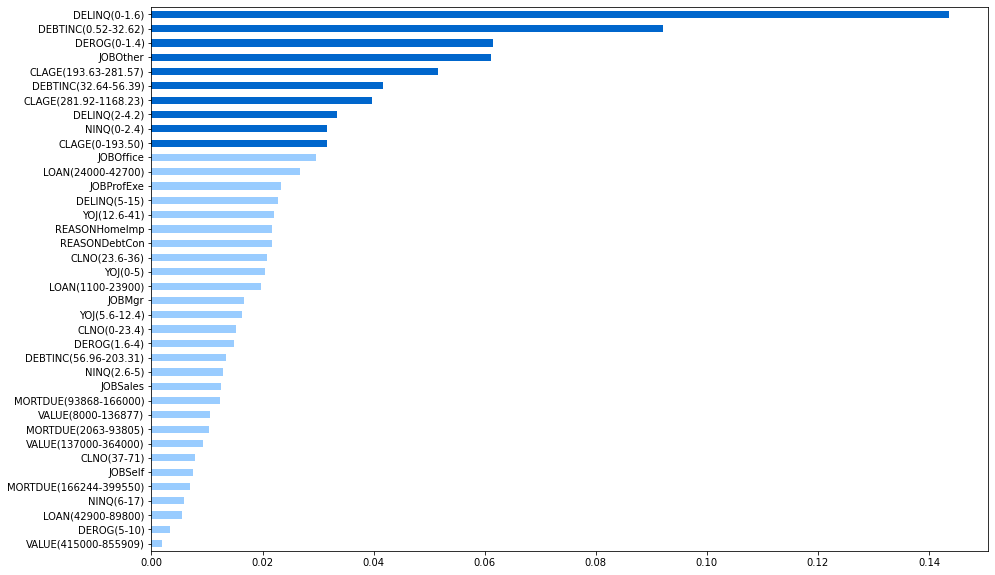

In [45]:
plt.figure(figsize=(15, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_sorted = feat_importances.nlargest(40).sort_values(ascending=True)
colors = ['#99CCFF' for _ in range(40)]
colors[-12:] = ['#0066CC' for i in range(12)]
feat_importances_sorted.plot(kind='barh', color=colors)

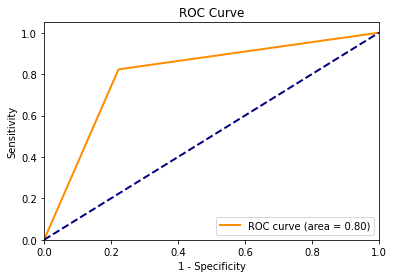

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


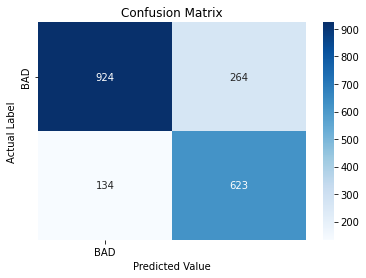

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=["BAD"], yticklabels=["BAD"], fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

### Grille de score

In [49]:
# Define the coefficients for each group
coefficients = {
    'DELINQ': {
        '0-1.6': 0.1323,
        '2-4.2': 0.0590,
        '5-15': 0.0548
    },
    'DEROG': {
        '0-1.4': 0.0808,
        '1.6-4': 0.0536,
        '5-10': 0.0129
    },
    'DEBTINC': {
        '0.52-32.62': 0.0462,
        '32.64-56.39': 0.0357,
        '56.96-203.31': 0.0554
    },
    'CLAGE': {
        '0-193.50': 0.0445,
        '193.63-281.57': 0.0260,
        '281.92-1168.23': 0.0130
    },
    'NINQ': {
        '0-2.4': 0.0393,
        '2.6-5': 0.0178,
        '6-17': 0.0153
    },
    'JOBS': {
        'Mgr': 0.0144,
        'Office': 0.0154,
        'Other': 0.0344,
        'ProfExe': 0.0137,
        'Sales': 0.0086,
        'Self': 0.0074
    },
    'REASON': {
        'DebtCon': 0.0171,
        'HomeImp': 0.0170
    },
    'CLNO': {
        '0-23.4': 0.0163,
        '23.6-36': 0.0162,
        '37-71': 0.0095
    },
    'YOJ': {
        '0-5': 0.0193,
        '5.6-12.4': 0.0150,
        '12.6-41': 0.0136
    },
    'MORTDUE': {
        '2063-93805': 0.0097,
        '93868-166000': 0.0096,
        '166244-399550': 0.0102
    },
    'VALUE': {
        '8000-136877': 0.0095,
        '137000-364000': 0.0093,
        '415000-855909': 0.0040,
        '855910-8559090': 0.0001
    },
    'LOAN': {
        '1100-23900': 0.0189,
        '24000-42700': 0.0168,
        '42900-89800': 0.0075,
        '89844-898440': 0.0002
    }
}

# Select the best coefficient from each group and calculate the total weight
total_weight = sum(max(group.values()) for group in coefficients.values())

# Calculate the percentage score for each coefficient
for group, values in coefficients.items():
    print(f"{group}:")
    for interval, coefficient in values.items():
        percentage_score = coefficient / total_weight * 100
        print(f"  {interval}: {percentage_score:.2f}%")


DELINQ:
  0-1.6: 27.68%
  2-4.2: 12.34%
  5-15: 11.46%
DEROG:
  0-1.4: 16.90%
  1.6-4: 11.21%
  5-10: 2.70%
DEBTINC:
  0.52-32.62: 9.67%
  32.64-56.39: 7.47%
  56.96-203.31: 11.59%
CLAGE:
  0-193.50: 9.31%
  193.63-281.57: 5.44%
  281.92-1168.23: 2.72%
NINQ:
  0-2.4: 8.22%
  2.6-5: 3.72%
  6-17: 3.20%
JOBS:
  Mgr: 3.01%
  Office: 3.22%
  Other: 7.20%
  ProfExe: 2.87%
  Sales: 1.80%
  Self: 1.55%
REASON:
  DebtCon: 3.58%
  HomeImp: 3.56%
CLNO:
  0-23.4: 3.41%
  23.6-36: 3.39%
  37-71: 1.99%
YOJ:
  0-5: 4.04%
  5.6-12.4: 3.14%
  12.6-41: 2.85%
MORTDUE:
  2063-93805: 2.03%
  93868-166000: 2.01%
  166244-399550: 2.13%
VALUE:
  8000-136877: 1.99%
  137000-364000: 1.95%
  415000-855909: 0.84%
  855910-8559090: 0.02%
LOAN:
  1100-23900: 3.95%
  24000-42700: 3.51%
  42900-89800: 1.57%
  89844-898440: 0.04%


In [50]:
# Calculate the percentage score for each coefficient
for group, values in coefficients.items():
    best_coefficient = max(values, key=values.get)
    percentage_score = values[best_coefficient] / total_weight * 100
    print(f"{group}: {best_coefficient} - {percentage_score:.2f}%")

DELINQ: 0-1.6 - 27.68%
DEROG: 0-1.4 - 16.90%
DEBTINC: 56.96-203.31 - 11.59%
CLAGE: 0-193.50 - 9.31%
NINQ: 0-2.4 - 8.22%
JOBS: Other - 7.20%
REASON: DebtCon - 3.58%
CLNO: 0-23.4 - 3.41%
YOJ: 0-5 - 4.04%
MORTDUE: 166244-399550 - 2.13%
VALUE: 8000-136877 - 1.99%
LOAN: 1100-23900 - 3.95%
